<center><span style='font-size:55px'>Project-X. Starship Titanic</span><center>

# Data Understanding. Visualisation

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import model_selection
from sklearn import feature_selection
from sklearn.model_selection import GridSearchCV
import optuna

In [2]:
df = pd.read_csv('data//train.csv', sep=',')
df_test = pd.read_csv('data//test.csv', sep=',')

##df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Как видим, в данных есть пропуски. Вдобавок, не у всех признаков верно указан тип данных, как, например, у CryoSleep и VIP.

In [4]:
len(df)

8693

In [5]:
df.duplicated(subset=df.columns).sum()

0

Зато нет дубликатов.

---

<span style='font-size:28px'>Visualisation</span>

Визуализируем данные. Начнем с количественных признаков.

In [6]:
# создадим список количественных признаков
num_cols = []
# сохраним список названий признаков и их типы
types_list = df.dtypes
# циклом пройдемся по столбцам types_list
for col in types_list.index:
    if types_list[col] != 'object':
        num_cols.append(col)
        
num_cols

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported']

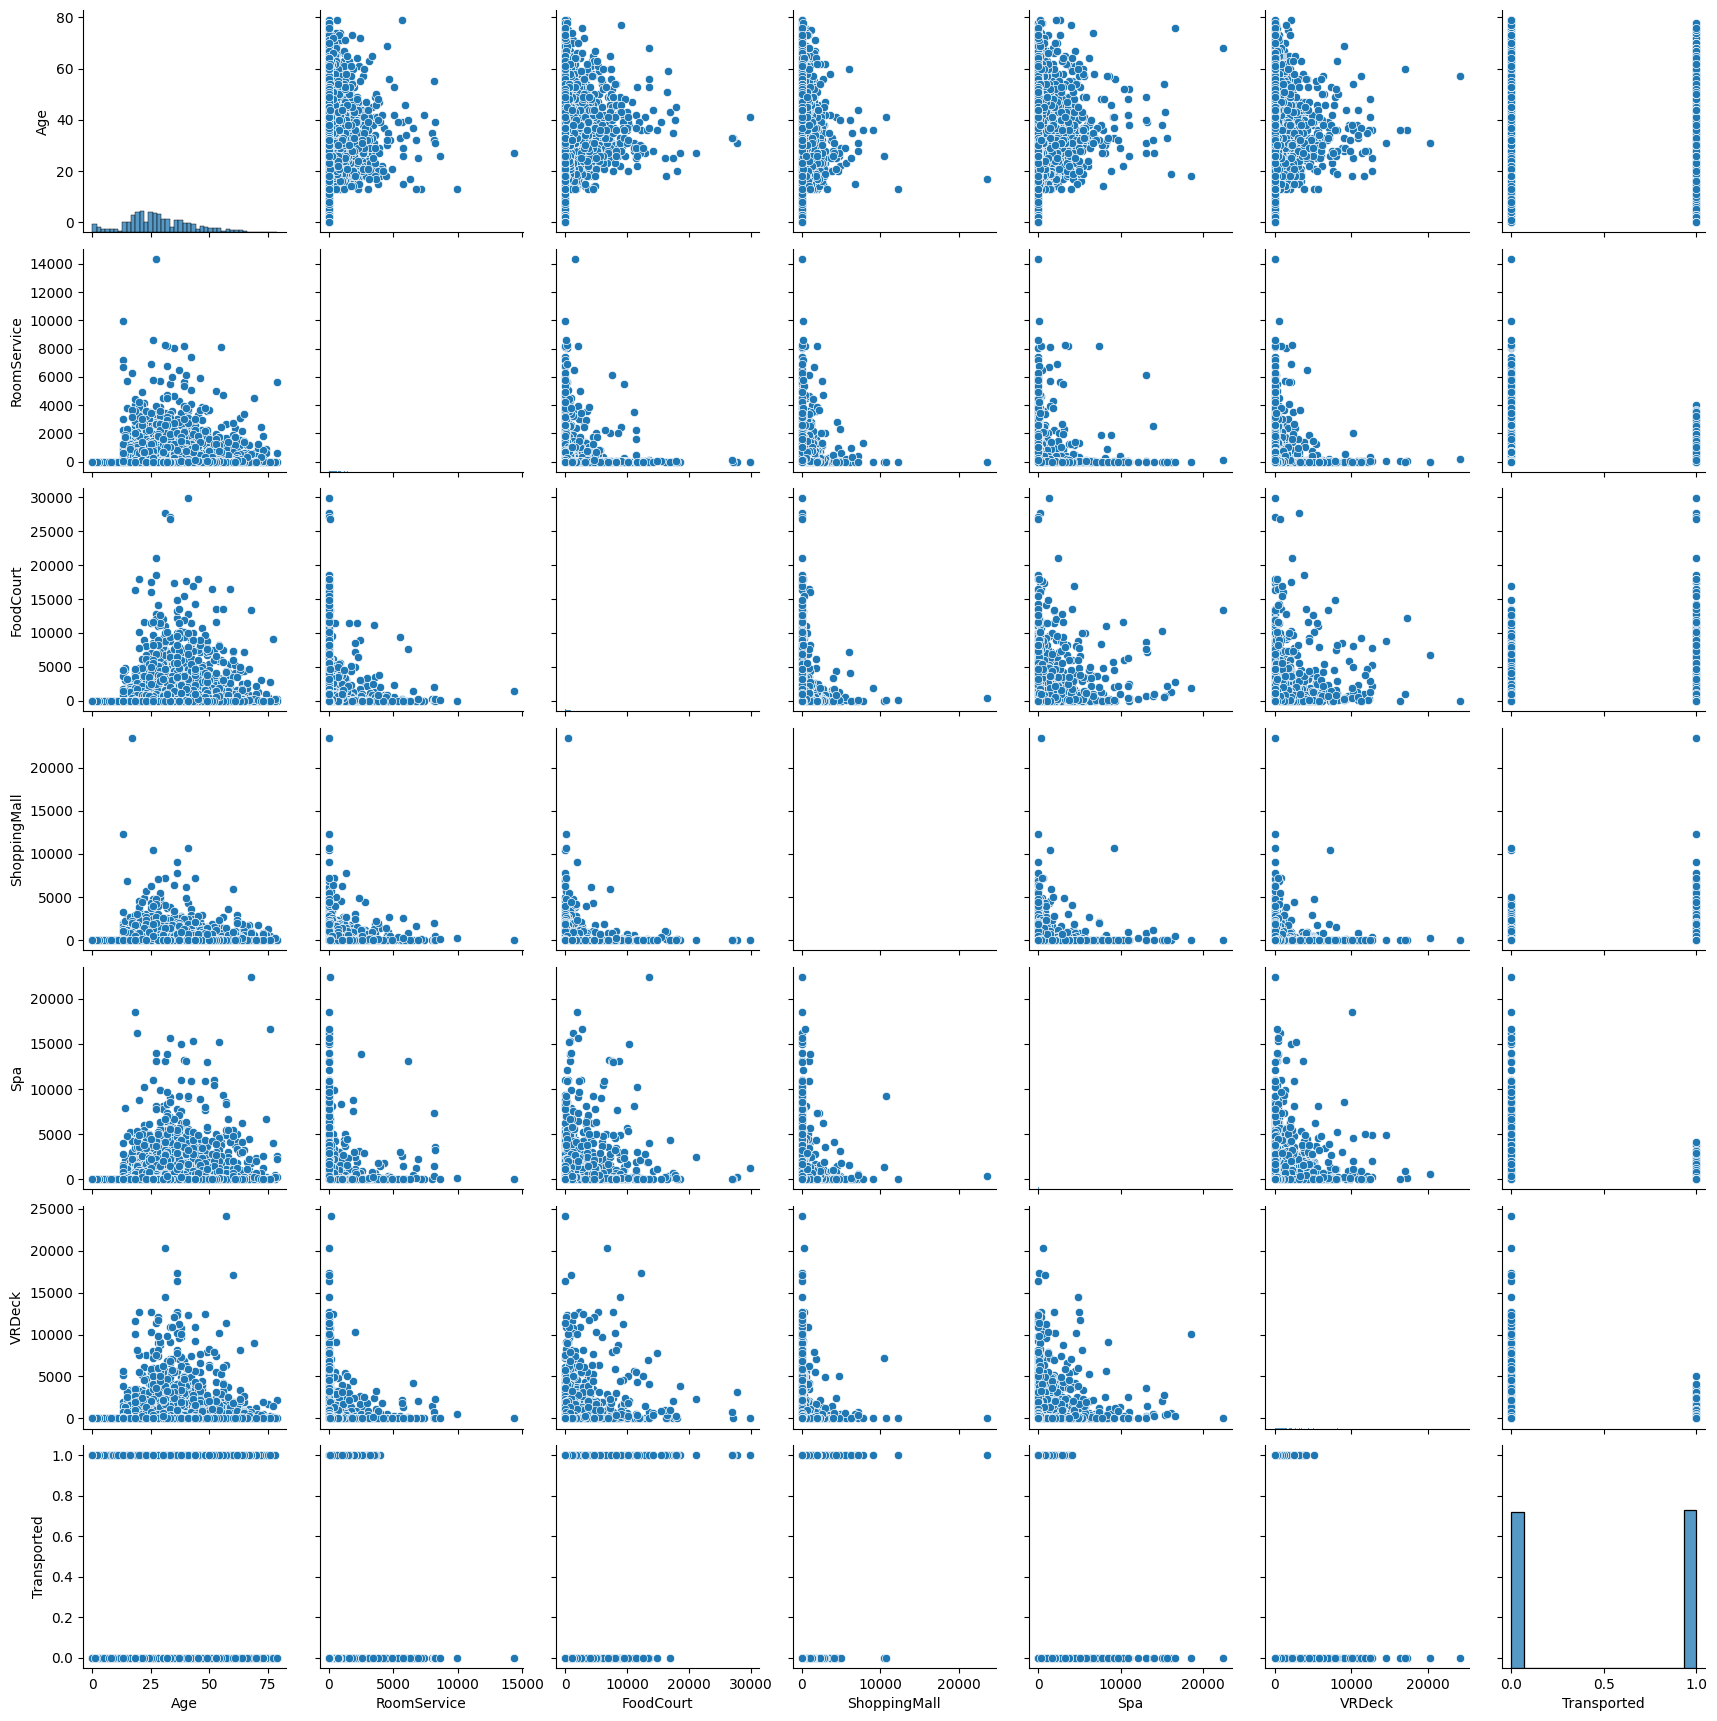

In [7]:
sns.pairplot(df[num_cols])

<Axes: xlabel='Transported', ylabel='Count'>

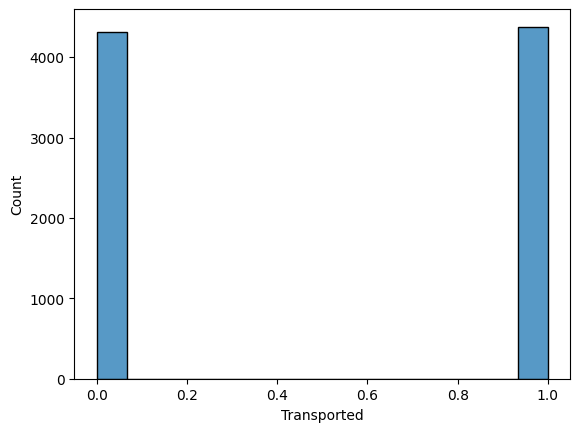

In [8]:
sns.histplot(df['Transported'])

Ключевой признак Transported сбалансирован, а вот признак VIP, наоборот, сильно несбалансирован, большинство пассажиров не пользовались VIP-услугами (т.е. VIP = 0).

<Axes: ylabel='Age'>

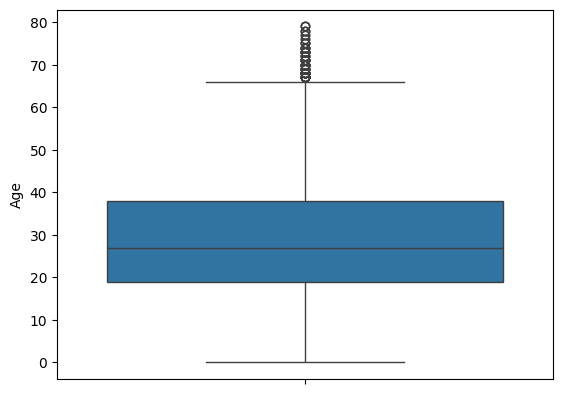

In [9]:
sns.boxplot(df['Age'])

Среди пассажиров превалирует возраст 20-38 лет. 

<Axes: xlabel='VRDeck', ylabel='Count'>

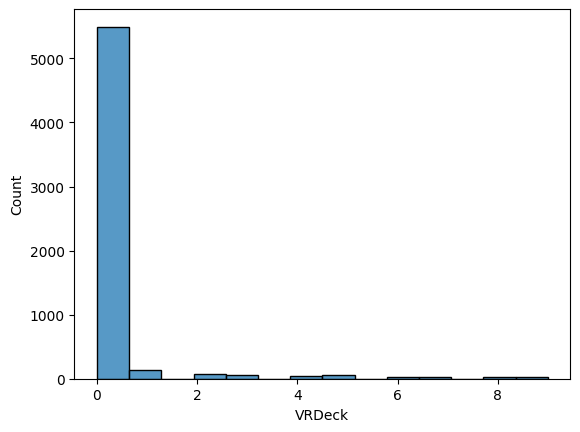

In [10]:
sns.histplot(df['VRDeck'][df['VRDeck'] < 10])

Значения признаков RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - сумм, потраченных пассажиром на различные услуги - имеют довольно высокий разброс. Посмотрим, что будет, если их прологарифмировать:

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

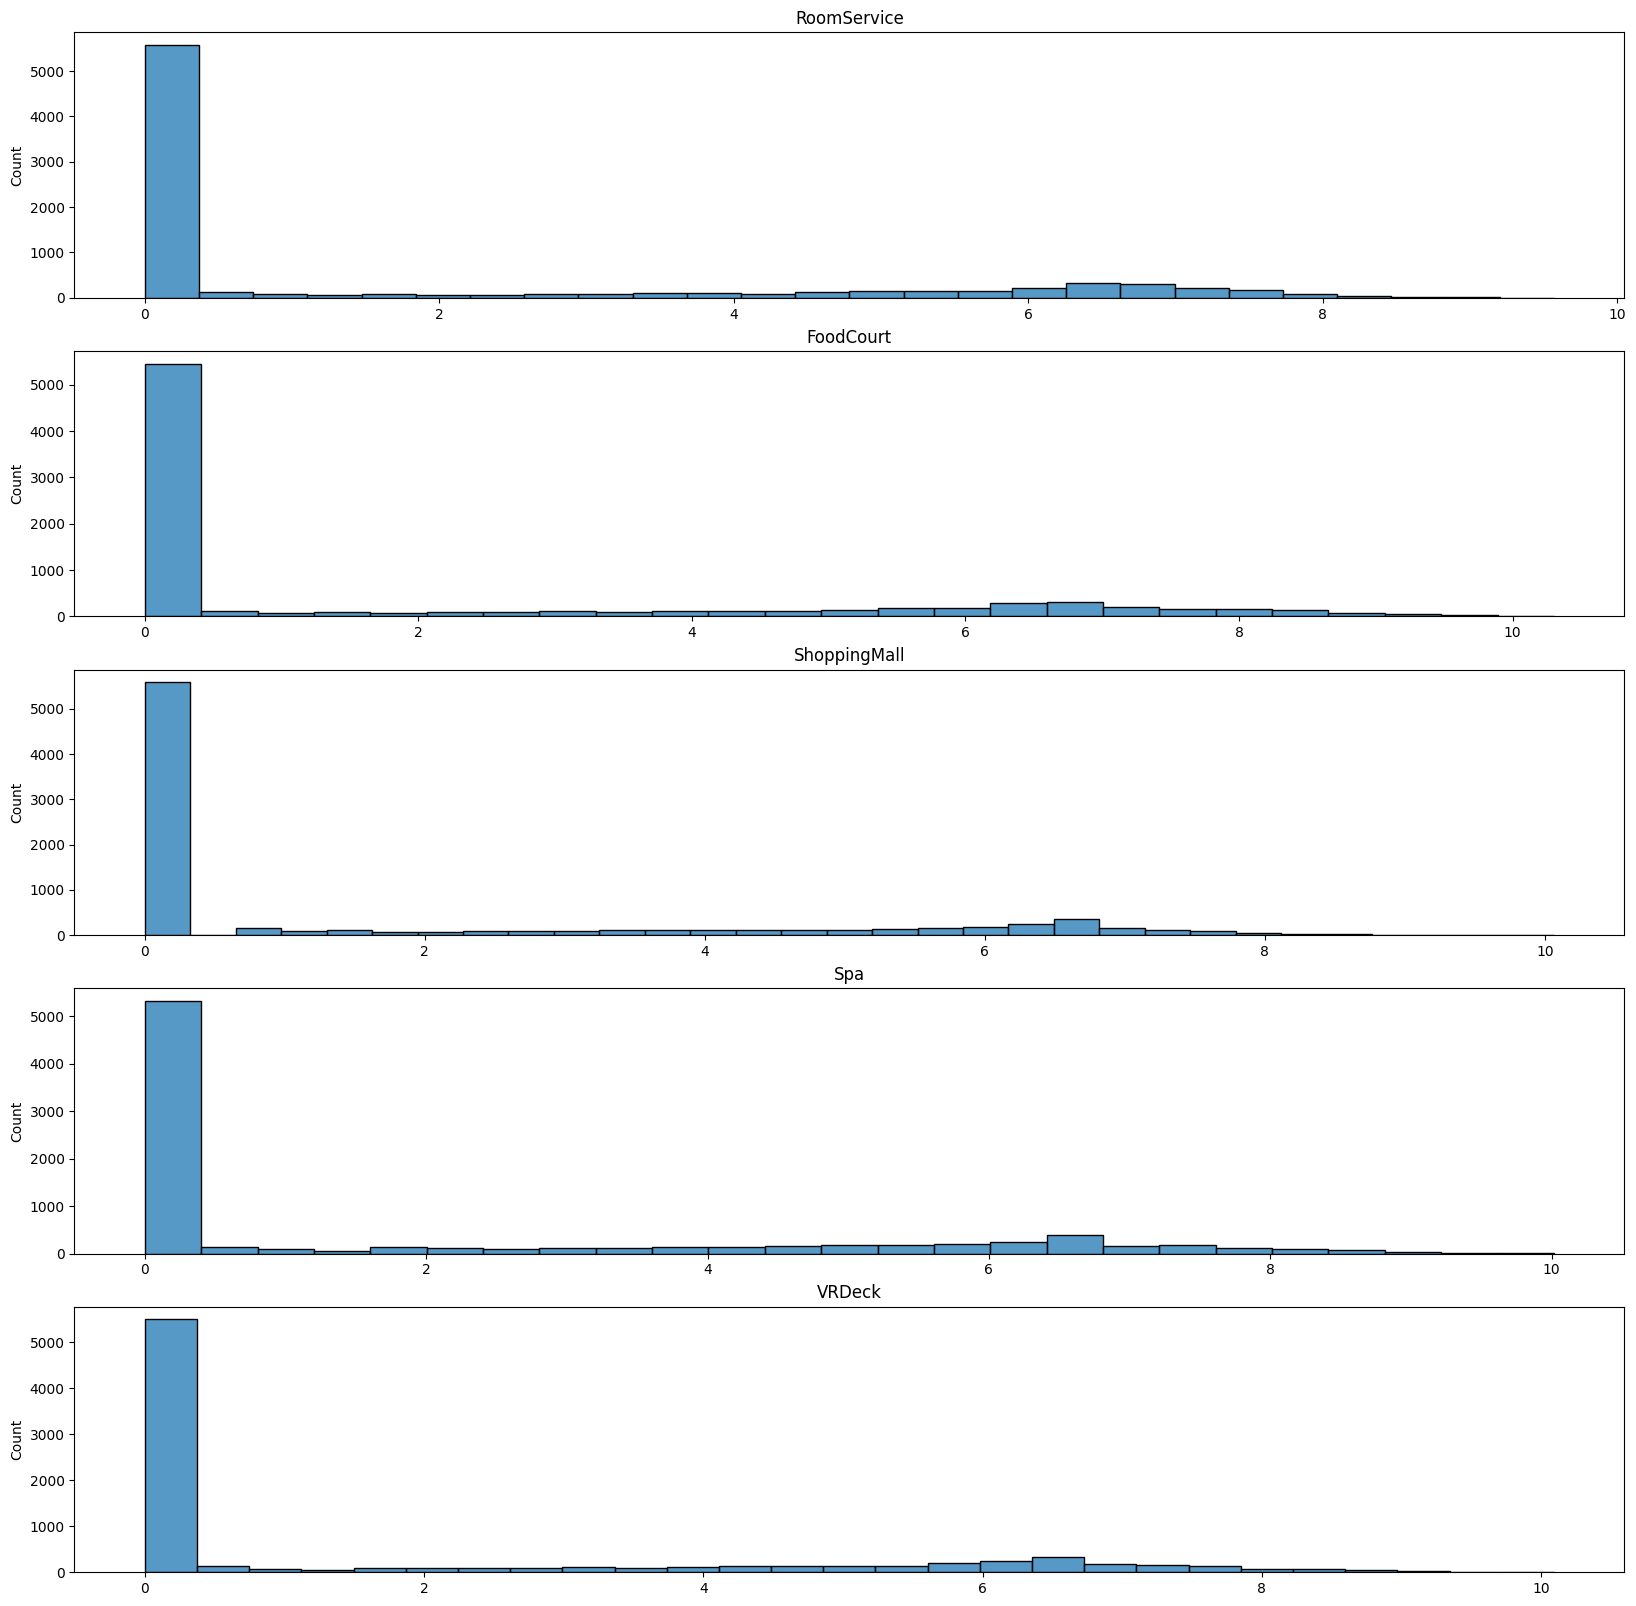

In [11]:
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

fig, ax = plt.subplots(len(services), 1, figsize=(20, 20))

for i in range(len(services)):
    feature = services[i]
    sns.histplot(np.log(df[feature]+1), ax=ax[i])
    ax[i].set_title(feature)
    ax[i].set_xlabel('')
    
plt.tight_layout

Отлично, теперь можем сказать, что выбросов в данных нет. Прологарифмируем признаки, указанные выше:

In [12]:
for i in services:
    df[i] = np.log(df[i] + 1)
    df_test[i] = np.log(df[i] + 1)

---

In [13]:
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [14]:
# создадим список категориальных признаков
cat_cols = []
# сохраним список названий признаков и их типы
types_list = df.dtypes
# циклом пройдемся по столбцам types_list
for col in types_list.index:
    if types_list[col] == 'object':
        cat_cols.append(col)
        
cat_cols

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'VIP',
 'Name']

In [15]:
print(df['VIP'].value_counts())
print('\n')
print(df['CryoSleep'].value_counts())

VIP
False    8291
True      199
Name: count, dtype: int64


CryoSleep
False    5439
True     3037
Name: count, dtype: int64


Признаки VIP и CryoSleep скорее относятся к бинарным (количественным), поэтому не будем относить их к категориальным.

In [16]:
cat_cols.remove('VIP')
cat_cols.remove('CryoSleep')
print(cat_cols)

['PassengerId', 'HomePlanet', 'Cabin', 'Destination', 'Name']


Здорово, перейдем к визуализации категориальных признаков.

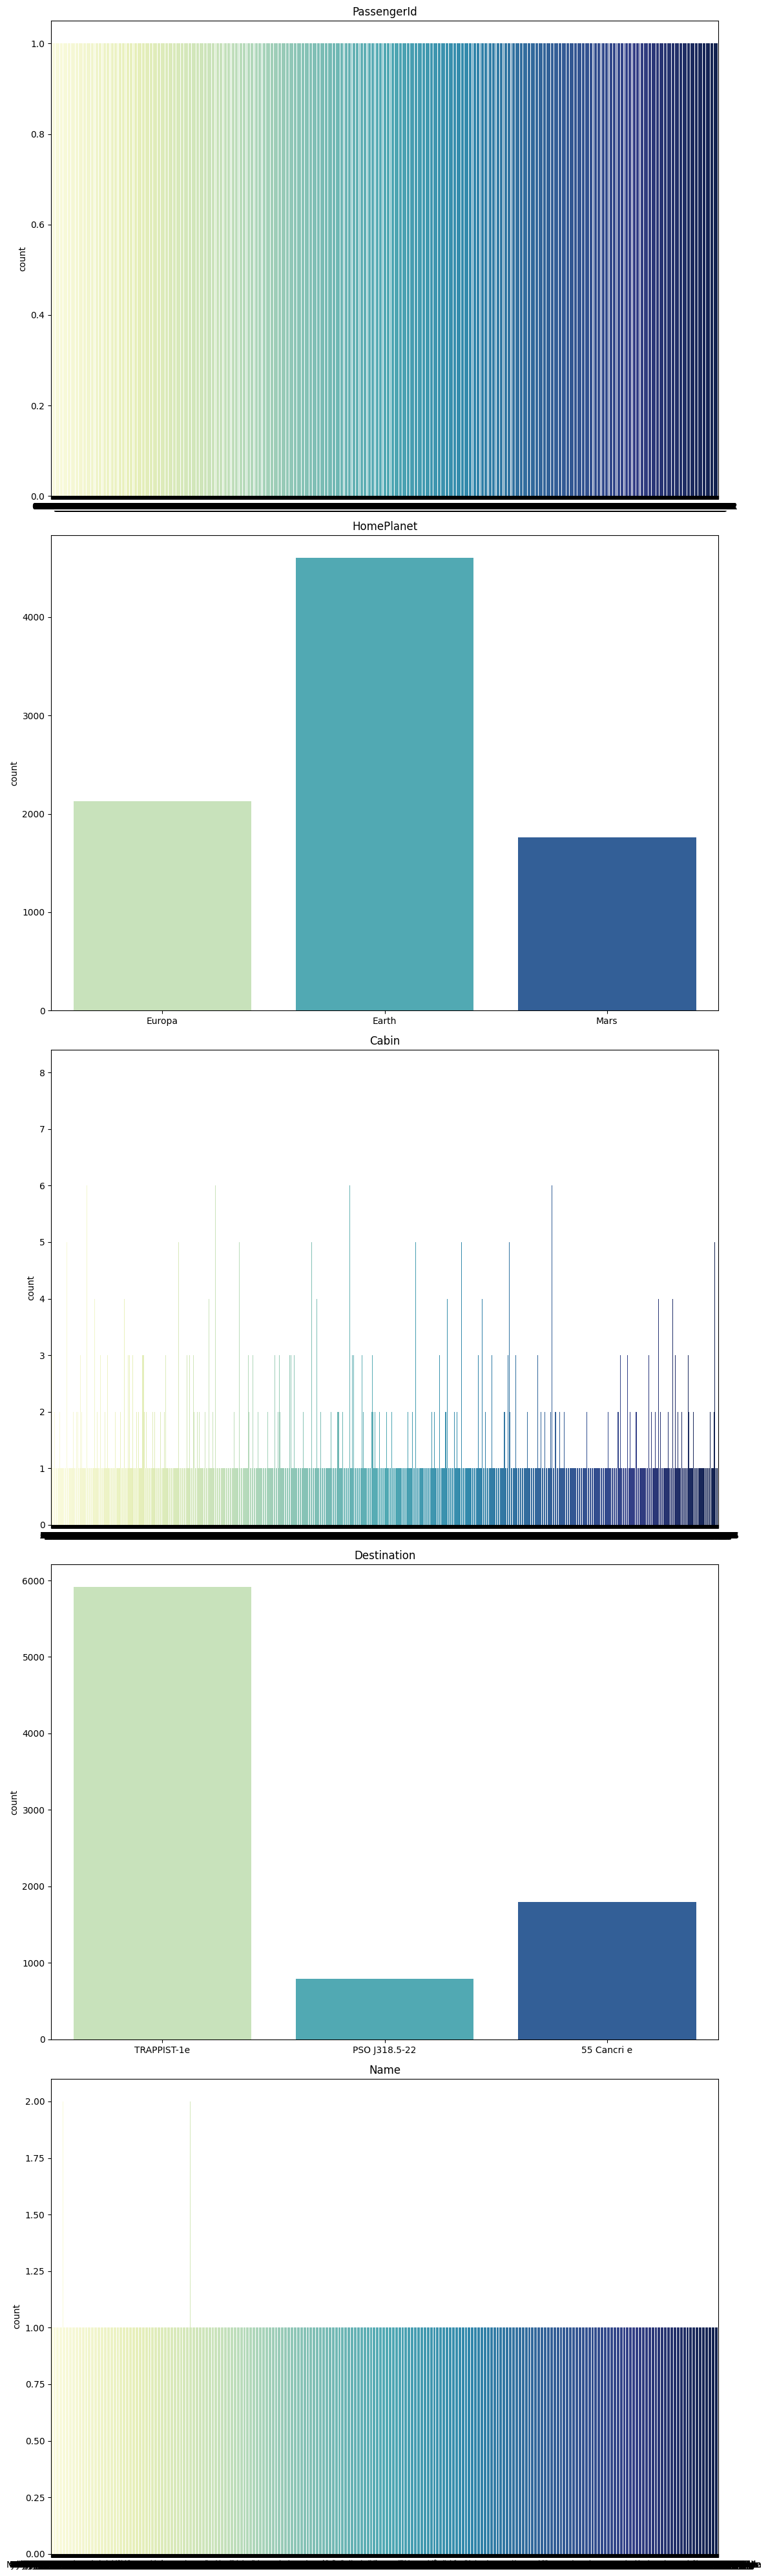

In [17]:
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(12, 40))

for i in range(len(cat_cols)):
    sns.countplot(df, x=cat_cols[i], palette='YlGnBu', ax=ax[i])
    ax[i].set_title(cat_cols[i])
    ax[i].set_xlabel('')

plt.tight_layout()

Как видим, сами по себе большинство категориальных признаков важной информации не несут, т.к. имеют множество уникальных значений. Но можно уже сказать, что признак Name слишком уникален, и фамилии не содержат каких-либо подсказок, поэтому лучше избавиться от него. С признаками PassengerId и Cabin еще нужно поработать. Сейчас можно сказать лишь то, что типичный пассажир - это землянин, направляющийся на TRAPPIST-1e.

In [18]:
df.drop('Name', axis=1, inplace=True)
df_test.drop('Name', axis=1, inplace=True)

Отлично, мы сделали первичный анализ данных: в датафрейме содержатся пропуски, как в категориальных, так и в количественных признаках, а текстовые признаки нужно преобразовать и закодировать. Переходим к следующему этапу.

# Exploratory Data Analysis. Feature Engineering

Начнем с обработки пропусков. 

In [19]:
cols_percent_na = df.isna().mean() * 100 # процент пропусков в столбцах
cols_percent_na.sort_values(ascending=False)

CryoSleep       2.496261
ShoppingMall    2.392730
VIP             2.335212
HomePlanet      2.312205
Cabin           2.289198
VRDeck          2.162660
FoodCourt       2.105142
Spa             2.105142
Destination     2.093639
RoomService     2.082135
Age             2.059128
PassengerId     0.000000
Transported     0.000000
dtype: float64

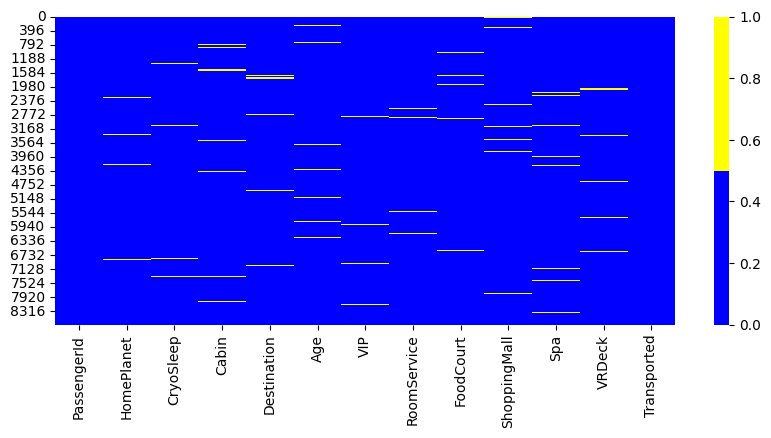

In [20]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_percent_na.index
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [21]:
df[(df.isna().sum(axis=1) > 1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
59,0064_02,NaN,True,E/3/S,TRAPPIST-1e,33.0,False,0.000000,0.000000,NaN,0.000000,0.000000,True
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.000000,0.000000,0.000000,0.000000,NaN,True
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.000000,7.797291,NaN,6.778785,6.095825,True
186,0210_01,NaN,True,D/6/P,55 Cancri e,24.0,False,0.000000,0.000000,NaN,0.000000,0.000000,True
251,0278_01,Earth,False,NaN,TRAPPIST-1e,35.0,False,0.000000,0.000000,0.000000,6.790097,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.000000,0.000000,NaN,0.000000,0.000000,True
8611,9192_01,Earth,False,F/1880/P,PSO J318.5-22,24.0,False,NaN,6.396930,NaN,0.000000,0.000000,True
8623,9197_04,Europa,False,C/308/P,55 Cancri e,30.0,False,7.358831,NaN,0.000000,NaN,7.720018,False
8666,9248_01,NaN,False,F/1792/S,55 Cancri e,38.0,NaN,3.367296,7.097549,6.881411,5.337538,0.000000,True


Т.к. пропуски довольно разреженны, и некоторые строки содержат даже несколько Nan, то будет довольно трудно построить предсказательную модель для предсказания пропусков. Попробуем сначала заполнить те пропуски, где это возможно:

In [22]:
# функция по заполнению пропусков константами
def fill_na_const(df):
    # в части визуализации было подмечено, что в признаки VIP большинство значений - 0
    df['VIP'] = df['VIP'].fillna(0)
    # в части визуализации обнаружили, что возраст большинства пассажиров - 20-38 лет, т.е. лучше всего заполнить 
    # признак "Age" медианным значением
    df['Age'] = df['Age'].fillna(df['Age'].median())
    # в части знакомства с данными выяснили, что типичный путешественник отправляется с планеты Earth к TRAPPIST-1e

    df['HomePlanet'] = df['HomePlanet'].fillna('Earth')
    df['Destination'] = df['Destination'].fillna('TRAPPIST-1e')

    # признак Cabin таит в себе три признака, поэтому его лучше заполнить модой
    df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])
# применяем функцию к тренировочной и тестовой выборкам
fill_na_const(df)
fill_na_const(df_test)

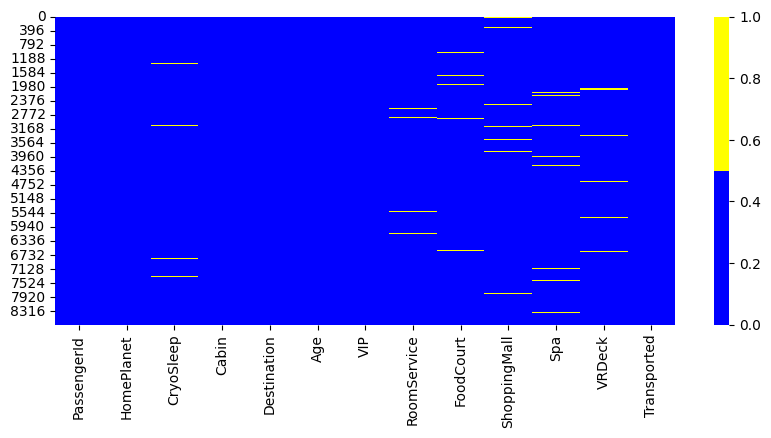

In [23]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_percent_na.index
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors),
)

Уже куда лучше.

In [24]:
df[(df.isna().sum(axis=1) > 1)].shape

(58, 13)

Заполним нулем те строки, в которых содержится больше одного пропуска в признаках-сервисах, т.к. с ними сложнее заполнить пропуски с помощью модели ML:

In [25]:
df_with_na = df[df.isna().sum(axis=1) > 1]
df_with_na[services] = df_with_na[services].fillna(0)
df.iloc[df_with_na.index] = df_with_na

df_test_with_na = df_test[df_test.isna().sum(axis=1) > 1]
df_test_with_na[services] = df_test_with_na[services].fillna(0)
df_test.iloc[df_test_with_na.index] = df_test_with_na

df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.000000,8.827615,0.000000,7.404888,4.317488,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.000000,0.000000,7.535297,0.693147,0.000000,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.000000,6.956545,0.000000,5.869297,8.082093,False


In [26]:
df_test[df_test.isna().sum(axis=1) > 1]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck


Итак, остались только сервисы и CryoSleep. Отметим, что сервисы - это непрерывные количественные признаки, а CryoSleep - бинарный. Однако эти признаки не требуют обработки, поэтому пока что перейдем к преобразованию остальных столбцов.

---

<span style='font-size:28px'>Feature Engineering</span>

In [27]:
df['PassengerId']

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

Видим, что номер группы содержит слишком много уникальных значений, поэтому из PassengerId достанем только кол-во человек в каждой группе.

In [28]:
# функция по созданию признаков
def feature_engineering(df):
    # из признака 'PassengerId' достанем кол-во человек в группе
    df['People'] = df['PassengerId'].apply(lambda x: int(x[-2:]))

    # как было сказано ранее, признак 'Cabin' содержит в себе сразу три: палуба/номер каюты/сторона
    df['Deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
    df['Num'] = df['Cabin'].apply(lambda x: x.split('/')[1])
    df['Side'] = df['Cabin'].apply(lambda x: x.split('/')[2])
    # удаляем столбцы-'контейнеры'
    df.drop(['Cabin', 'PassengerId'], axis=1, inplace=True)
# применяем функцию к тренировочной и тестовой выборкам
feature_engineering(df)
feature_engineering(df_test)

In [29]:
df['Deck'].value_counts()

Deck
F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

Признак Num неинформативен, признак Deck позже закодируем с помощью get_dummies(), а признак Side принимает только два значения - его лучше закодировать.

In [30]:
df['Side'] = df['Side'].apply(lambda x: 1 if x == 'S' else 0)
df.drop('Num', axis=1, inplace=True)

df_test['Side'] = df_test['Side'].apply(lambda x: 1 if x == 'S' else 0)
df_test.drop('Num', axis=1, inplace=True)

In [31]:
# функция по бинаризации признаков
def type_binarizer(df):
    # изменим тип бинарных признаков
    df['VIP'] = df['VIP'].astype('int8')
    def cryosleep_binarizer(x):
        if pd.isna(x): return np.nan
        elif x: return 1
        else: return 0
    df['CryoSleep'] = df['CryoSleep'].apply(cryosleep_binarizer)
df['Transported'] = df['Transported'].astype('int8')
# применяем функцию к тренировочной и тестовой выборкам
type_binarizer(df)
type_binarizer(df_test)

Возраст лучше разделить на категории.

In [32]:
print('Max age: {}'.format(df['Age'].max()))
print('Min age: {}'.format(df['Age'].min()))

Max age: 79.0
Min age: 0.0


In [33]:
df['Age'] = pd.cut(df['Age'], bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80], labels=[0, 1, 2, 3, 4, 5, 6, 7])
df_test['Age'] = pd.cut(df_test['Age'], bins=[-1, 10, 20, 30, 40, 50, 60, 70, 80], labels=[0, 1, 2, 3, 4, 5, 6, 7])

Наконец, воспользуемся методом get_dummies()

In [34]:
dummy_cols = ['HomePlanet', 'Destination', 'Deck']
df = pd.get_dummies(data=df, columns=dummy_cols, dtype=int)
df_test = pd.get_dummies(data=df_test, columns=dummy_cols, dtype=int)
df

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,People,...,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T
0,0.0,3,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,...,0,1,0,1,0,0,0,0,0,0
1,0.0,2,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,1,...,0,1,0,0,0,0,0,1,0,0
2,0.0,5,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,1,...,0,1,1,0,0,0,0,0,0,0
3,0.0,3,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,2,...,0,1,1,0,0,0,0,0,0,0
4,0.0,1,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,1,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,4,1,0.000000,8.827615,0.000000,7.404888,4.317488,0,1,...,0,0,1,0,0,0,0,0,0,0
8689,1.0,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,...,1,0,0,0,0,0,0,0,1,0
8690,0.0,2,0,0.000000,0.000000,7.535297,0.693147,0.000000,1,1,...,0,1,0,0,0,0,0,0,1,0
8691,0.0,3,0,0.000000,6.956545,0.000000,5.869297,8.082093,0,1,...,0,0,0,0,0,0,1,0,0,0


In [35]:
df.isna().sum()

CryoSleep                    217
Age                            0
VIP                            0
RoomService                  168
FoodCourt                    165
ShoppingMall                 187
Spa                          166
VRDeck                       164
Transported                    0
People                         0
Side                           0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
dtype: int64

---

Итак, все признаки, кроме CryoSleep, преобразованы в числовой формат. Сначала заполним пропуски в признаках из списка services.

In [36]:
def model_na_filler(df):
    # создаем список, в котором будут храниться строки (в виде датафреймов), в которых мы заполнили пропуски
    df_list = []
    # отдельно сохраним признак CryoSleep, чтобы присоединять его к строкам с заполненными значениями
    global_cryosleep = df['CryoSleep']
    # сохраняем датафрейм без пропусков, т.е. тренировочную выборку
    train_data = df.dropna()
    # проходимся циклом по созданному в части визуализации данных списку услуг
    for i in services:
        # создаем маску для тестовой выборки
        test_mask = df[i].isna()
        # задаем тренировочную выборку и целевой признак
        X_train = train_data.drop(i, axis=1)
        y_train = train_data[i]
        # задаем тестовую выборку
        X_test = df[test_mask].drop(i, axis=1)
        index = X_test.index
        # т.к. мы уже обучаем модель машинного обучения, нужно отскейлить данные. 
        # т.к. данные распределены ненормально и особых выбросов нет, используем MinMaxScaler()
        scaler = preprocessing.MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        # обучаем модель случайного леса. подбирать гиперпараметры для каждой модели долго (проверено), используем
        # базовые параметры с ограничениями по глубине дерева и объектов в листе для предотвращения переобучения
        model = ensemble.RandomForestRegressor(max_depth=8, min_samples_leaf=10, n_estimators=75)
        model.fit(X_train_scaled, y_train)
        # предсказание
        y_pred = model.predict(X_test_scaled)
        # создаем датафрейм тестовой выборки
        df_filled_na = pd.DataFrame(X_test, index=index)
        # добавляем к фичам предсказанное значение пропусков
        df_filled_na[i] = y_pred
        # не забываем добавлять CryoSleep по индексам
        cryosleep = global_cryosleep[index]
        df_filled_na['CryoSleep'] = cryosleep
        # сохраняем датафрейм с заполненными значениями в списке
        df_list.append(df_filled_na)
    # соединяем все датафреймы, в которых мы заполнили пропуски
    frame = pd.concat(df_list, axis=0)
    # не забываем, что во frame и train_data не хватает строк, где признак CryoSleep с пропусками
    cryo_df = df[df['CryoSleep'].isna()]
    # соединяем все в финальный датафрейм
    final_df = pd.concat([train_data, frame, cryo_df], axis=0).sort_index()
    return final_df

final_df = model_na_filler(df)
final_df_test = model_na_filler(df_test)

In [37]:
final_df.isna().sum()

CryoSleep                    217
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Transported                    0
People                         0
Side                           0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
Deck_A                         0
Deck_B                         0
Deck_C                         0
Deck_D                         0
Deck_E                         0
Deck_F                         0
Deck_G                         0
Deck_T                         0
dtype: int64

Наконец, заполняем злополучный CryoSleep и преобразовываем его в бинарный (True==1, False==0).

In [38]:
def cryosleep_filler(final_df):    
    X_train = final_df[final_df['CryoSleep'].notna()].drop('CryoSleep', axis=1)
    y_train = final_df[final_df['CryoSleep'].notna()]['CryoSleep']
    X_test = final_df[final_df['CryoSleep'].isna()].drop('CryoSleep', axis=1)
    # т.к. мы уже обучаем модель машинного обучения, нужно отскейлить данные. 
    # т.к. данные распределены ненормально и особых выбросов нет, используем MinMaxScaler()
    scaler = preprocessing.MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    param_grid = {'n_estimators': [50, 100, 150],
                'max_depth': [10, 20, 30],
                'min_samples_leaf': [10, 12, 15, 20]}
    grid_searcher = GridSearchCV(estimator=ensemble.RandomForestClassifier(), param_grid=param_grid)
    grid_searcher.fit(X_train_scaled, y_train)

    model = grid_searcher.best_estimator_
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    X_test['CryoSleep'] = y_pred
    X_train['CryoSleep'] = y_train
    df = pd.concat([X_train, X_test], axis=0, ignore_index=True)
    return df

df = cryosleep_filler(final_df)
df_test = cryosleep_filler(final_df_test)

In [39]:
df['CryoSleep'] = df['CryoSleep'].astype('int8')
df_test['CryoSleep'] = df_test['CryoSleep'].astype('int8')
df['CryoSleep'].value_counts()

CryoSleep
0    5560
1    3133
Name: count, dtype: int64

---

<span style='font-size:28px'>Feature Selection</span>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        8693 non-null   category
 1   VIP                        8693 non-null   int8    
 2   RoomService                8693 non-null   float64 
 3   FoodCourt                  8693 non-null   float64 
 4   ShoppingMall               8693 non-null   float64 
 5   Spa                        8693 non-null   float64 
 6   VRDeck                     8693 non-null   float64 
 7   Transported                8693 non-null   int8    
 8   People                     8693 non-null   int64   
 9   Side                       8693 non-null   int64   
 10  HomePlanet_Earth           8693 non-null   int32   
 11  HomePlanet_Europa          8693 non-null   int32   
 12  HomePlanet_Mars            8693 non-null   int32   
 13  Destination_55 Cancri e    8693 n

<Axes: >

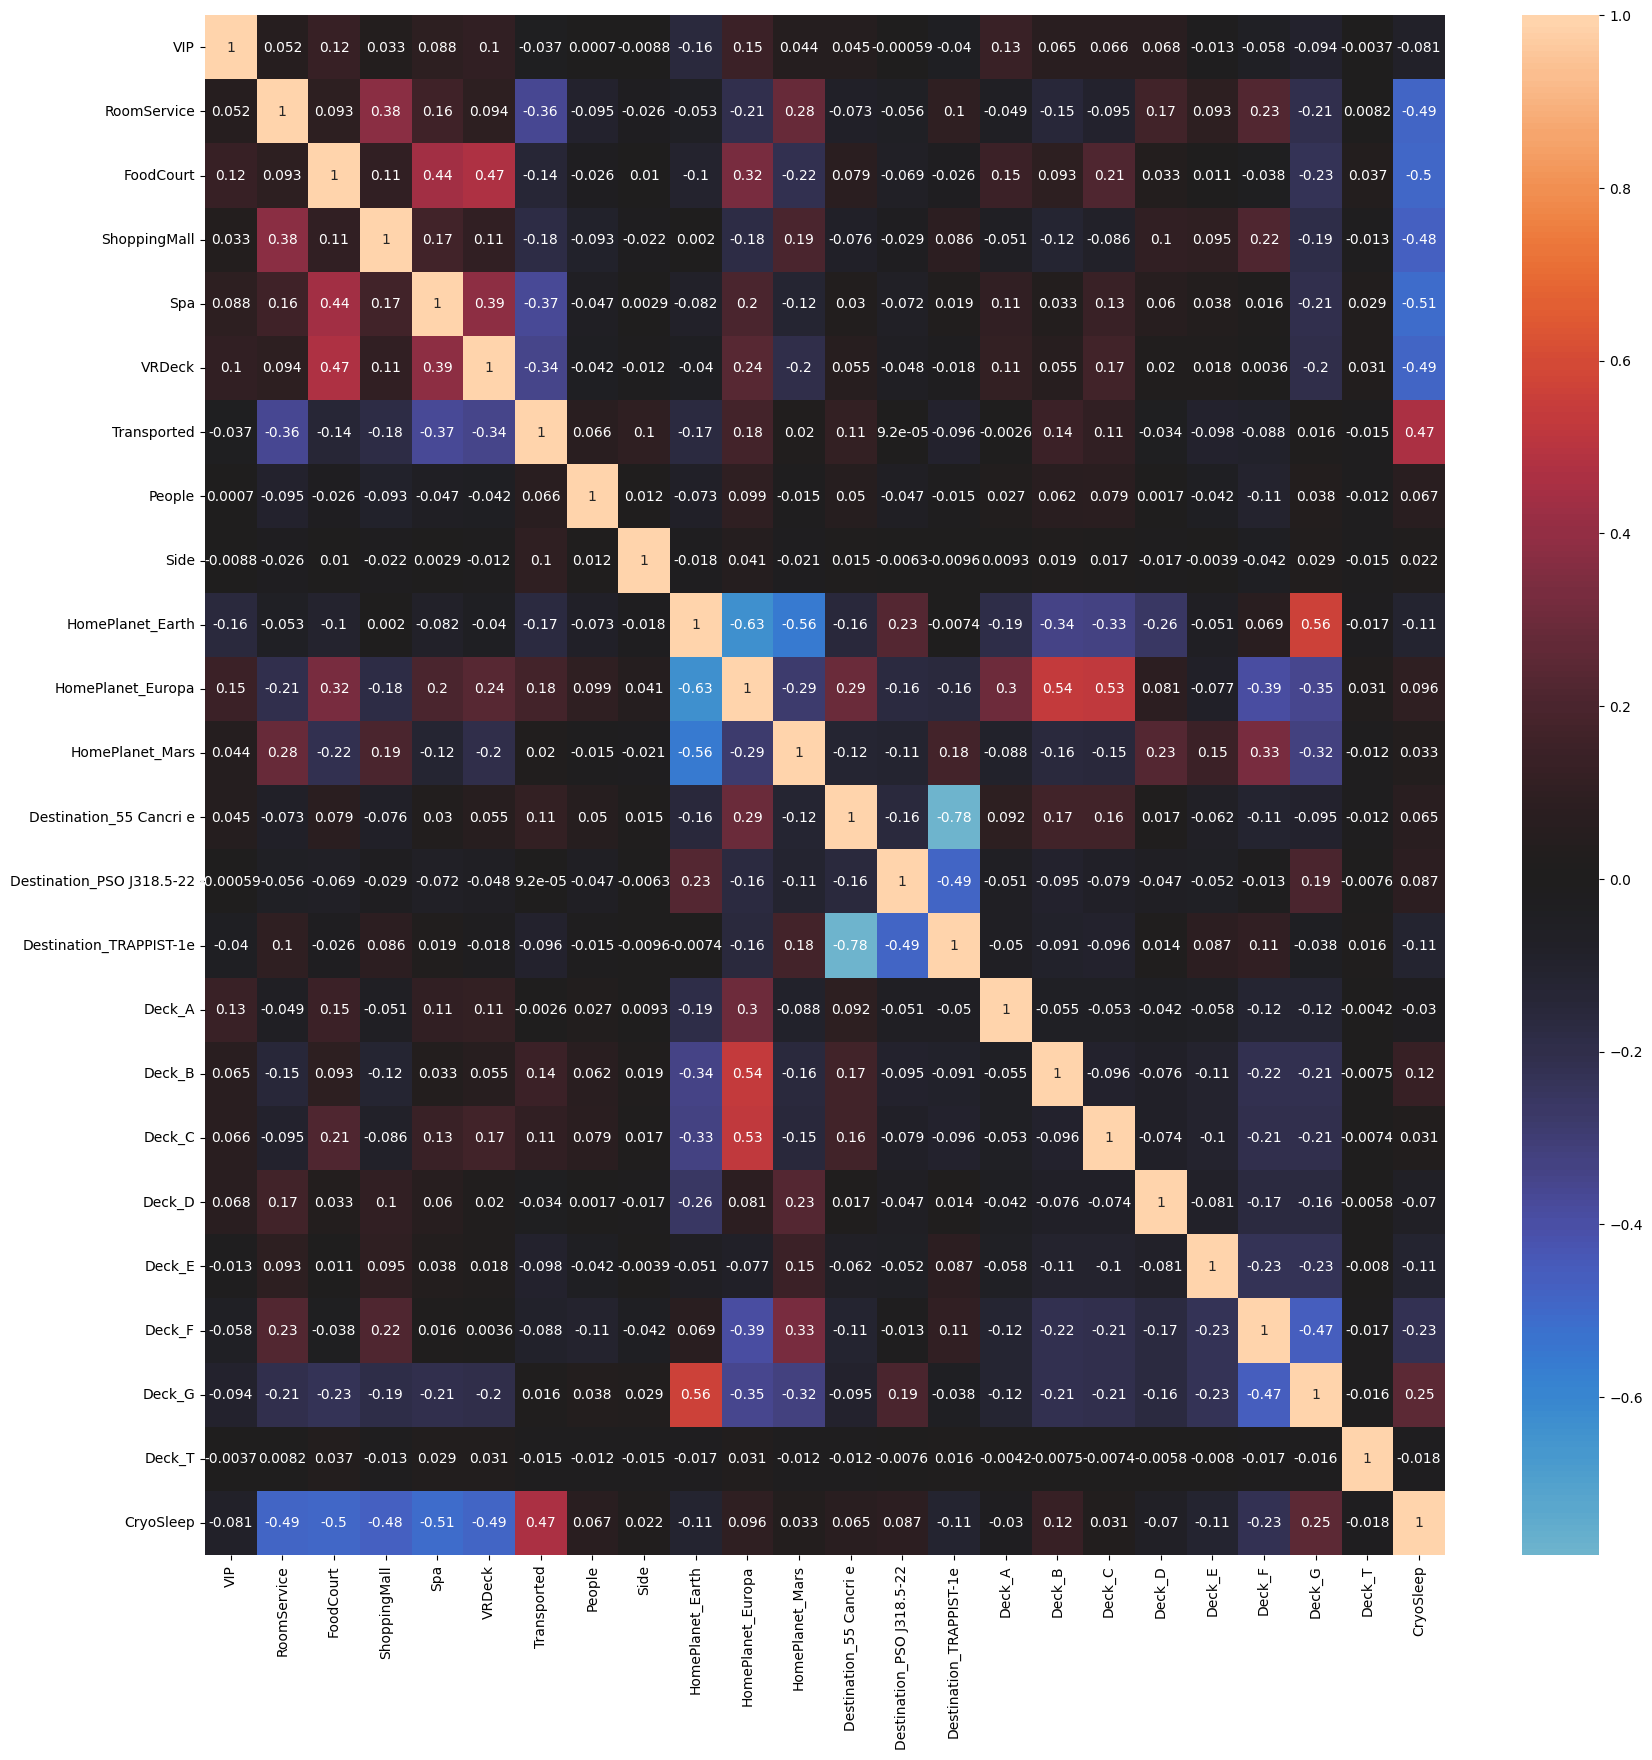

In [41]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, center=0)

In [42]:
df.drop('Destination_TRAPPIST-1e', axis=1, inplace=True)
df_test.drop('Destination_TRAPPIST-1e', axis=1, inplace=True)

Итак, из графика мультиколлинеарности видно, что сильной зависимости между признаками нет. Выберем 15 самых информативных признаков с помощью рекурсивного исключения признаков (RFE).

In [43]:
X = df.drop('Transported', axis=1)
y = df['Transported']

selector = feature_selection.RFE(estimator=linear_model.LinearRegression(), n_features_to_select=15)
selector = selector.fit(X, y)
best_columns = selector.get_feature_names_out()
best_columns

array(['VIP', 'RoomService', 'Spa', 'VRDeck', 'Side', 'HomePlanet_Earth',
       'HomePlanet_Europa', 'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Deck_A', 'Deck_C', 'Deck_E', 'Deck_F', 'Deck_G', 'CryoSleep'],
      dtype=object)

In [44]:
selector.ranking_

array([6, 1, 1, 4, 5, 1, 1, 9, 1, 1, 1, 1, 1, 8, 1, 2, 1, 7, 1, 1, 1, 3,
       1])

# Machine Learning

<span style='font-size:28px'>Scaling, splitting, cooking...</span>

In [45]:
X = df[best_columns]
y = df['Transported']

X_test = df_test[best_columns]

In [46]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

In [47]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, stratify=y, test_size=0.2)

In [48]:
X_train.shape

(6954, 15)

Сначала хотел оценивать качество моделей на f1-метрике, но, как показали эксперименты, максимизируя метрику accuracy (точность) вместо f1, результат на тестовой выборке в соревновании увеличился.

In [49]:
# Создадим словарь, в который будем заносить модели как ключи и показатели accuracy как значения словаря
models_dict = {}

---

<span style='font-size:28px'>Basic Models</span>

<span style='font-size:20px'>Logistic Regression</span>

In [50]:
cv = model_selection.KFold(n_splits=7)
param_grid = {'solver': ['liblinear', 'sag', 'newton-cholesky'],
              'penalty': ['l1', 'l2']}

grid_searcher = GridSearchCV(estimator=linear_model.LogisticRegression(max_iter=1200),
                             param_grid=param_grid, cv=cv)

grid_searcher.fit(X_train, y_train)

log_reg_best_model = grid_searcher.best_estimator_
log_reg_best_model.fit(X_train, y_train)
log_reg_metrics = metrics.accuracy_score(y_val, log_reg_best_model.predict(X_val))

In [51]:
grid_searcher.best_estimator_

LogisticRegression(max_iter=1200, penalty='l1', solver='liblinear')

<span style='font-size:20px'>Decision Tree Classifier</span>

In [52]:
def optuna_func_dt_clf(trial):
    param_space = {'max_depth': trial.suggest_int('max_depth', 10, 50, 5),
                   'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 40, 5),}

    dt_model = tree.DecisionTreeClassifier()
    dt_model.fit(X_train, y_train)
    
    return metrics.accuracy_score(y_val, dt_model.predict(X_val))

study_dt = optuna.create_study(study_name='DT_Classifier', direction='maximize')
study_dt.optimize(optuna_func_dt_clf, n_trials=20)

[I 2024-08-30 17:00:42,147] A new study created in memory with name: DT_Classifier
[I 2024-08-30 17:00:42,168] Trial 0 finished with value: 0.7561817136285222 and parameters: {'max_depth': 20, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7561817136285222.
[I 2024-08-30 17:00:42,184] Trial 1 finished with value: 0.753306497987349 and parameters: {'max_depth': 10, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.7561817136285222.
[I 2024-08-30 17:00:42,200] Trial 2 finished with value: 0.7544565842438183 and parameters: {'max_depth': 15, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7561817136285222.
[I 2024-08-30 17:00:42,216] Trial 3 finished with value: 0.757906843013226 and parameters: {'max_depth': 25, 'min_samples_leaf': 20}. Best is trial 3 with value: 0.757906843013226.
[I 2024-08-30 17:00:42,231] Trial 4 finished with value: 0.7510063254744106 and parameters: {'max_depth': 50, 'min_samples_leaf': 5}. Best is trial 3 with value: 0.757906843013226.
[I 2024-0

In [53]:
study_dt.best_value

0.757906843013226

Как видим, базовые модели показывают довольно слабую метрику. Воспользуемся ансамблиевыми моделями.

<span style='font-size:28px'>Advanced Models</span>

<span style='font-size:20px'>Random Forest Classifier</span>

In [54]:
def optuna_func_rf_clf(trial):
    param_space = {'n_estimators': trial.suggest_int('n_estimators', 50, 200, 20),
                   'max_depth': trial.suggest_int('max_depth', 10, 50, 5),
                   'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 40, 5)}
    
    model = ensemble.RandomForestClassifier(**param_space)
    model.fit(X_train, y_train)
    
    return metrics.accuracy_score(y_val, model.predict(X_val))

study_rf = optuna.create_study(study_name='RF_Classifier', direction='maximize')
study_rf.optimize(optuna_func_rf_clf, n_trials=30)

[I 2024-08-30 17:00:42,600] A new study created in memory with name: RF_Classifier
[I 2024-08-30 17:00:42,971] Trial 0 finished with value: 0.7993099482461185 and parameters: {'n_estimators': 130, 'max_depth': 40, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7993099482461185.
[I 2024-08-30 17:00:43,318] Trial 1 finished with value: 0.7981598619896493 and parameters: {'n_estimators': 130, 'max_depth': 10, 'min_samples_leaf': 10}. Best is trial 0 with value: 0.7993099482461185.
[I 2024-08-30 17:00:43,548] Trial 2 finished with value: 0.7889591719378953 and parameters: {'n_estimators': 90, 'max_depth': 40, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.7993099482461185.
[I 2024-08-30 17:00:43,740] Trial 3 finished with value: 0.7958596894767107 and parameters: {'n_estimators': 70, 'max_depth': 10, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.7993099482461185.
[I 2024-08-30 17:00:44,207] Trial 4 finished with value: 0.7809085681426107 and parameters: {'n_estimato

In [55]:
optuna.visualization.plot_optimization_history(study_rf, target_name='accuracy score')

In [56]:
study_rf.best_value

0.8004600345025877

In [57]:
models_dict[ensemble.RandomForestClassifier(**study_rf.best_params)] = study_rf.best_value

<span style='font-size:20px'>Gradient Boosting Classifier</span>

In [77]:
def optuna_func_gb_clf(trial):
    param_space = {'n_estimators': trial.suggest_int('n_estimators', 50, 200, 20),
                   'max_depth': trial.suggest_int('max_depth', 10, 50, 5),
                   'min_samples_leaf': trial.suggest_int('min_samples_leaf', 5, 40, 5),
                    'learning_rate': trial.suggest_categorical('learning_rate', [0.015])}
                   #'learning_rate': trial.suggest_categorical('learning_rate', [0.01, 0.015, 0.02])}
    
    model = ensemble.GradientBoostingClassifier(**param_space)
    model.fit(X_train, y_train)
    
    return metrics.accuracy_score(y_val, model.predict(X_val))

study_gb = optuna.create_study(study_name='GB_Classifier', direction='maximize')
study_gb.optimize(optuna_func_gb_clf, n_trials=30)

[I 2024-08-30 17:17:12,114] A new study created in memory with name: GB_Classifier
[I 2024-08-30 17:17:12,947] Trial 0 finished with value: 0.7918343875790684 and parameters: {'n_estimators': 70, 'max_depth': 50, 'min_samples_leaf': 35, 'learning_rate': 0.015}. Best is trial 0 with value: 0.7918343875790684.
[I 2024-08-30 17:17:15,727] Trial 1 finished with value: 0.7832087406555491 and parameters: {'n_estimators': 90, 'max_depth': 45, 'min_samples_leaf': 5, 'learning_rate': 0.015}. Best is trial 0 with value: 0.7918343875790684.
[I 2024-08-30 17:17:18,418] Trial 2 finished with value: 0.7998849913743531 and parameters: {'n_estimators': 190, 'max_depth': 35, 'min_samples_leaf': 30, 'learning_rate': 0.015}. Best is trial 2 with value: 0.7998849913743531.


In [59]:
optuna.visualization.plot_optimization_history(study_gb, target_name='accuracy score')

In [60]:
study_gb.best_value

0.8027602070155262

In [61]:
models_dict[ensemble.GradientBoostingClassifier(**study_gb.best_params)] = study_gb.best_value

<span style='font-size:20px'>Stacking Classifier</span>

In [78]:
stacking_model = ensemble.StackingClassifier(estimators=[
    ('GB_Clf', ensemble.GradientBoostingClassifier(**study_gb.best_params)), 
    ('RandomForestClf', ensemble.RandomForestClassifier(**study_rf.best_params)),
    ('DecisionTree', tree.DecisionTreeClassifier(**study_dt.best_params))
    ],
    final_estimator=log_reg_best_model)

stacking_model.fit(X_train, y_train)
stack_metrics = metrics.accuracy_score(y_val, stacking_model.predict(X_val))
models_dict[stacking_model] = stack_metrics
stack_metrics

0.79700977573318

---

Как видим, ансамблиевые модели показывают лучшую метрику. Определим лучшую модель:

In [65]:
best_value = 0
best_model = 0

for model in models_dict:
    if models_dict[model] > best_value:
        best_model = model
        best_value = models_dict[model]

print(f'Best model: {best_model}')
print('\n')
print(f'Best accuracy score: {round(best_value, 2)}')

Best model: GradientBoostingClassifier(max_depth=25, min_samples_leaf=25, n_estimators=150)


Best accuracy score: 0.8


In [67]:
#best_model = ensemble.GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=25, min_samples_leaf=25, n_estimators=150)

In [68]:
(best_model.predict_proba(X_val)[:, 1] > 0.5)

array([ True, False,  True, ...,  True, False, False])

In [72]:
thresh = np.linspace(0.3, 0.6, 13)
best_thresh = 0
final_score = 0

y_pred = best_model.predict_proba(X_val)
y_pred = pd.Series(y_pred[:, 1])

for i in thresh:
    y_prediction = pd.Series.map(y_pred, arg=lambda x: 1 if x >= i else 0)
    # считаем f1 метрику
    score = metrics.accuracy_score(y_val, y_prediction)
    # если метрика лучше прошлой, то сохраняем ее вместе с порогом
    if score > final_score:
        final_score = score
        thresh = i
        
print(f'Best score is {round(final_score, 3,)} with threshold {round(thresh, 3)}')

Best score is 0.786 with threshold 0.525


In [73]:
y_pred = pd.Series(best_model.predict_proba(X_test)[:, 1] >= thresh, dtype=bool)
y_pred

0       True
1       True
2       True
3       True
4       True
        ... 
4272    True
4273    True
4274    True
4275    True
4276    True
Length: 4277, dtype: bool

In [ ]:
X_tester = X_test.copy()

In [ ]:
df_test['Transported'] = y_pred

In [ ]:
df_test

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,People,Side,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,CryoSleep,Transported
0,2,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,...,0,0,0,0,0,0,1,0,1,True
1,1,0,1.740550,1.194706,1.448822,1.989232,1.570003,1,1,1,...,0,0,0,0,0,1,0,0,0,True
2,3,0,1.565317,2.217276,0.000000,2.283631,1.591686,1,1,0,...,0,0,1,0,0,0,0,0,1,True
3,3,0,0.000000,2.098967,1.934256,2.209453,1.835435,1,1,0,...,0,0,1,0,0,0,0,0,0,True
4,1,0,1.904646,1.660640,1.795732,1.993147,0.741276,1,1,1,...,0,0,0,0,0,1,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,0,0.000000,0.000000,2.003076,0.000000,1.708702,1,0,0,...,0,0,0,0,0,1,0,0,0,True
4273,2,0,1.834610,0.000000,1.958870,1.372307,0.000000,6,0,0,...,0,0,1,0,0,0,0,0,0,True
4274,4,0,2.201137,0.000000,1.631370,0.741276,0.000000,1,0,0,...,0,0,0,0,0,0,1,0,0,True
4275,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,1,...,0,0,0,0,0,1,0,0,0,True


In [ ]:
sub_sample = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv', sep=',')
df_test['PassengerId'] = sub_sample['PassengerId']
final_df = df_test[['PassengerId', 'Transported']]
final_df.to_csv('/kaggle/working/submission.csv', index=False)